# Criando os Nomes

In [116]:
import pandas as pd

In [117]:
nomes_f = pd.read_json('https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f')
nomes_m = pd.read_json('https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m')

In [118]:
print('Quantidade de nomes: {}'.format(len(nomes_f) + len(nomes_m)))

Quantidade de nomes: 400


In [119]:
frames = [nomes_f, nomes_m]

In [120]:
nomes = pd.concat(frames)['nome'].to_frame()

In [121]:
nomes.sample(5)

,nome
192,ZILDA
46,LUCIANO
111,TAMIRES
145,ITALO
129,MIRIAN


# Incluindo ID dos Alunos

In [122]:
import numpy as np

In [123]:
np.random.seed(123)

In [124]:
total_alunos = len(nomes)

In [125]:
total_alunos

400

In [126]:
nomes['id_aluno'] = np.random.permutation(total_alunos)+1
nomes

,nome,id_aluno
0,MARIA,235
1,ANA,43
2,FRANCISCA,304
3,ANTONIA,156
4,ADRIANA,343
...,...,...
195,WALTER,231
196,ARLINDO,99
197,MICHAEL,323
198,ALVARO,383


In [127]:
dominios = ['@dominiodoemail.com.br', '@servicodoemail.com']

In [128]:
nomes['dominio'] = np.random.choice(dominios, total_alunos)

In [129]:
nomes

,nome,id_aluno,dominio
0,MARIA,235,@dominiodoemail.com.br
1,ANA,43,@servicodoemail.com
2,FRANCISCA,304,@servicodoemail.com
3,ANTONIA,156,@servicodoemail.com
4,ADRIANA,343,@servicodoemail.com
...,...,...,...
195,WALTER,231,@dominiodoemail.com.br
196,ARLINDO,99,@servicodoemail.com
197,MICHAEL,323,@dominiodoemail.com.br
198,ALVARO,383,@servicodoemail.com


In [130]:
nomes['email'] = nomes.nome.str.cat(nomes.dominio).str.lower()

In [131]:
nomes.sample(5)

,nome,id_aluno,dominio,email
46,FABIANA,358,@servicodoemail.com,fabiana@servicodoemail.com
38,DIEGO,294,@dominiodoemail.com.br,diego@dominiodoemail.com.br
136,NILTON,271,@dominiodoemail.com.br,nilton@dominiodoemail.com.br
119,MOISES,4,@servicodoemail.com,moises@servicodoemail.com
101,GISELE,298,@servicodoemail.com,gisele@servicodoemail.com


# Criando a Tabela Cursos

In [132]:
!pip3 install html5lib
!pip3 install lxml

In [133]:
import html5lib

In [134]:
url = 'http://tabela-cursos.herokuapp.com/index.html'
cursos = pd.read_html(url)

In [135]:
cursos = cursos[0]

# Alterando o Index de Cursos

In [136]:
cursos = cursos.rename(columns = {'Nome do curso': 'nome_do_curso'})

In [137]:
cursos.head(2)

,nome_do_curso
0,Lógica de programação
1,Java para Web


In [138]:
cursos['id'] = cursos.index + 1

In [139]:
cursos.head(5)

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5


In [140]:
cursos = cursos.set_index('id')

In [141]:
cursos.head(5)

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


# Matrículando os Alunos nos Cursos

In [142]:
nomes['matriculas'] = np.ceil(np.random.exponential(size=total_alunos) * 1.5).astype(int)

In [143]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
153,CAUA,77,@servicodoemail.com,caua@servicodoemail.com,2
36,DEBORA,338,@dominiodoemail.com.br,debora@dominiodoemail.com.br,1
135,ROSILENE,387,@servicodoemail.com,rosilene@servicodoemail.com,2
176,CELIO,388,@servicodoemail.com,celio@servicodoemail.com,3
144,VINICIOS,147,@servicodoemail.com,vinicios@servicodoemail.com,1


In [144]:
nomes.matriculas.describe()

count    400.000000
mean       1.920000
std        1.460799
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       10.000000
Name: matriculas, dtype: float64

In [145]:
import seaborn as sns

<AxesSubplot:xlabel='matriculas', ylabel='Count'>

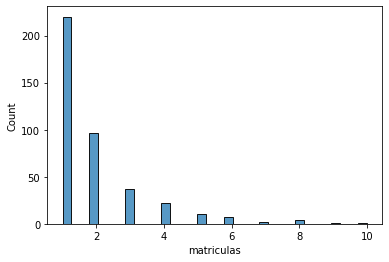

In [146]:
sns.histplot(nomes.matriculas)

In [147]:
nomes.matriculas.value_counts()

1     220
2      96
3      37
4      22
5      10
6       7
8       4
7       2
10      1
9       1
Name: matriculas, dtype: int64

In [148]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
194,CLARA,277,@servicodoemail.com,clara@servicodoemail.com,1
64,ROBSON,290,@servicodoemail.com,robson@servicodoemail.com,1
13,DANIEL,195,@servicodoemail.com,daniel@servicodoemail.com,1
98,GILSON,134,@dominiodoemail.com.br,gilson@dominiodoemail.com.br,2
33,NATALIA,192,@dominiodoemail.com.br,natalia@dominiodoemail.com.br,1


# Selecionando Cursos

In [149]:
todas_matriculas = []
x = np.random.rand(20)
prob = x / sum(x)

In [150]:
for index, row in nomes.iterrows():
    id = row.id_aluno
    matriculas = row.matriculas
    for i in range(matriculas):
        mat = [id, np.random.choice(cursos.index, p = prob)]
        todas_matriculas.append(mat)
matriculas = pd.DataFrame(todas_matriculas, columns = ['id_aluno', 'id_curso'])

In [151]:
matriculas.head(5)

,id_aluno,id_curso
0,235,13
1,43,6
2,43,2
3,43,5
4,43,13


In [152]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno': 'quantidade_de_alunos'})

In [153]:
matriculas_por_curso

,quantidade_de_alunos,nome_do_curso
id_curso,,
2,35,Java para Web
3,16,C# para Web
4,6,Ruby on Rails
5,60,Cursos de Python
6,31,PHP com MySql
7,18,.NET para web
8,108,Novas integrações com Java
9,25,TDD com Java
10,7,Código limpo com C#


# Saida em Diferentes Formatos

In [154]:
matriculas_por_curso.to_csv('matriculas_por_curso.csv', index = False)

In [155]:
matriculas_json = matriculas_por_curso.to_json()
matriculas_json

'{"quantidade_de_alunos":{"2":35,"3":16,"4":6,"5":60,"6":31,"7":18,"8":108,"9":25,"10":7,"11":49,"12":82,"13":80,"14":13,"15":41,"16":20,"17":95,"18":25,"19":18,"20":39},"nome_do_curso":{"2":"Java para Web","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","8":"Novas integra\\u00e7\\u00f5es com Java","9":"TDD com Java","10":"C\\u00f3digo limpo com C#","11":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","12":"Hardware b\\u00e1sico","13":"Persist\\u00eancia com .NET","14":"Desenvolvendo jogos","15":"An\\u00e1lise de dados","16":"Estat\\u00edstica b\\u00e1sica","17":"Internet das coisas","18":"Programa\\u00e7\\u00e3o funcional","19":"Boas pr\\u00e1ticas em Java","20":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

In [156]:
matriculas_html = matriculas_por_curso.to_html()
matriculas_html

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>quantidade_de_alunos</th>\n      <th>nome_do_curso</th>\n    </tr>\n    <tr>\n      <th>id_curso</th>\n      <th></th>\n      <th></th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>2</th>\n      <td>35</td>\n      <td>Java para Web</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>16</td>\n      <td>C# para Web</td>\n    </tr>\n    <tr>\n      <th>4</th>\n      <td>6</td>\n      <td>Ruby on Rails</td>\n    </tr>\n    <tr>\n      <th>5</th>\n      <td>60</td>\n      <td>Cursos de Python</td>\n    </tr>\n    <tr>\n      <th>6</th>\n      <td>31</td>\n      <td>PHP com MySql</td>\n    </tr>\n    <tr>\n      <th>7</th>\n      <td>18</td>\n      <td>.NET para web</td>\n    </tr>\n    <tr>\n      <th>8</th>\n      <td>108</td>\n      <td>Novas integrações com Java</td>\n    </tr>\n    <tr>\n      <th>9</th>\n      <td>25</td>\n      <td>TDD com Java</td>\n    </tr>

# Criando o Bando SQL

In [157]:
!pip install sqlalchemy

In [158]:
from sqlalchemy import create_engine, MetaData, Table

In [159]:
engine = create_engine('sqlite:///:memory:')

In [160]:
engine

Engine(sqlite:///:memory:)

In [161]:
matriculas_por_curso.to_sql('matriculas', engine)

In [162]:
print(engine.table_names())

['matriculas']


# Buscando do Banco SQL

In [163]:
query = 'select * from matriculas where quantidade_de_alunos < 20' 

In [165]:
pd.read_sql(query, engine)

,id_curso,quantidade_de_alunos,nome_do_curso
0,3,16,C# para Web
1,4,6,Ruby on Rails
2,7,18,.NET para web
3,10,7,Código limpo com C#
4,14,13,Desenvolvendo jogos
5,19,18,Boas práticas em Java


In [166]:
pd.read_sql_table('matriculas', engine, columns = ['nome_do_curso', 'quantidade_de_alunos'])

,nome_do_curso,quantidade_de_alunos
0,Java para Web,35
1,C# para Web,16
2,Ruby on Rails,6
3,Cursos de Python,60
4,PHP com MySql,31
5,.NET para web,18
6,Novas integrações com Java,108
7,TDD com Java,25
8,Código limpo com C#,7
9,Preparatório para certificação Java,49


In [167]:
muitas_matriculas = pd.read_sql_table('matriculas', engine, columns = ['nome_do_curso', 'quantidade_de_alunos'])

In [170]:
muitas_matriculas = muitas_matriculas.query('quantidade_de_alunos > 80')

In [171]:
muitas_matriculas

,nome_do_curso,quantidade_de_alunos
6,Novas integrações com Java,108
10,Hardware básico,82
15,Internet das coisas,95


# Escrevendo no Banco

In [172]:
muitas_matriculas.to_sql('muitas_matriculas', con=engine)

In [173]:
print(engine.table_names())

['matriculas', 'muitas_matriculas']


# Nomes dos Alunos e Turmas da Próxima Turma

In [174]:
matriculas_por_curso

,quantidade_de_alunos,nome_do_curso
id_curso,,
2,35,Java para Web
3,16,C# para Web
4,6,Ruby on Rails
5,60,Cursos de Python
6,31,PHP com MySql
7,18,.NET para web
8,108,Novas integrações com Java
9,25,TDD com Java
10,7,Código limpo com C#


In [175]:
matriculas

,id_aluno,id_curso
0,235,13
1,43,6
2,43,2
3,43,5
4,43,13
...,...,...
763,231,5
764,99,17
765,323,8
766,383,20


In [176]:
id_curso = 16
proxima_turma = matriculas.query('id_curso == {}'.format(id_curso))
proxima_turma

,id_aluno,id_curso
12,156,16
18,379,16
21,218,16
43,173,16
134,212,16
157,203,16
196,211,16
240,178,16
276,387,16
289,91,16


In [177]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
140,NILSON,361,@dominiodoemail.com.br,nilson@dominiodoemail.com.br,2
167,ANGELO,85,@servicodoemail.com,angelo@servicodoemail.com,1
135,RUBENS,256,@dominiodoemail.com.br,rubens@dominiodoemail.com.br,1


In [179]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))

,id_curso,nome,dominio,email,matriculas
id_aluno,,,,,
156,16,ANTONIA,@servicodoemail.com,antonia@servicodoemail.com,3
379,16,PATRICIA,@servicodoemail.com,patricia@servicodoemail.com,2
218,16,CAMILA,@servicodoemail.com,camila@servicodoemail.com,1
173,16,LARISSA,@dominiodoemail.com.br,larissa@dominiodoemail.com.br,7
212,16,PAULA,@dominiodoemail.com.br,paula@dominiodoemail.com.br,3
203,16,TATIANE,@servicodoemail.com,tatiane@servicodoemail.com,2
211,16,TANIA,@dominiodoemail.com.br,tania@dominiodoemail.com.br,3
178,16,JOSIANE,@dominiodoemail.com.br,josiane@dominiodoemail.com.br,6
387,16,ROSILENE,@servicodoemail.com,rosilene@servicodoemail.com,2


In [184]:
proxima_turma = proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))[['nome']]

In [183]:
nome_curso = cursos.loc[id_curso].nome_do_curso
nome_curso

'Estatística básica'

In [186]:
proxima_turma = proxima_turma.rename(columns = {'nome': 'Alunos do Curso de {}'.format(nome_curso)})

In [188]:
proxima_turma.sample(5)

,Alunos do Curso de Estatística básica
id_aluno,
97,ELTON
379,PATRICIA
156,ANTONIA
218,CAMILA
178,JOSIANE


# Exportando para Excel

In [189]:
proxima_turma.to_excel('proxima_turma_estatiscica_basica.xlsx', index = False)